<a href="https://colab.research.google.com/github/AlexDaciuk/Algoritmos/blob/master/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import pylab
import seaborn as sns
import numpy as np
import sklearn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

sns.set_style("darkgrid")

In [ ]:
GSPREADHSEET_DOWNLOAD_URL = (
    "https://docs.google.com/spreadsheets/d/{gid}/export?format=csv&id={gid}".format
)

COL2_GID = '1Ff-H9TlwHBnvNcGupLZ7NwkSWxiiaOoUA9STRCwn9MU'
COL1_GID = '1km-AEIMnWVGqMtK-W28n59hqS5Kufhd0'

df_col2 = pd.read_csv(GSPREADHSEET_DOWNLOAD_URL(gid=COL2_GID))

url = 'https://drive.google.com/file/d/1km-AEIMnWVGqMtK-W28n59hqS5Kufhd0/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

df_col1 = pd.read_csv(path)

# Joineo los dataframes por ID, asi tengo bien relacionado el id_usuario entre los 2 dataframes
# A simple vista parecen estar en el mismo orden los id_usuario en ambos datasets, pero por si las dudas
# hago un join y me aseguro que queden bien
df_all = df_col2.set_index('id_usuario').join(df_col1.set_index('id_usuario'))

# **Random Forest Classifier**

In [ ]:
# Select the columns that will result useful
df_forest_classifier = df_all[['tipo_de_sala', 'genero', 'edad', 'amigos', 'parientes', 'precio_ticket', 'nombre_sede', 'volveria']] 

In [ ]:
# One hot for all the string columns
# tipo_de_sala
onehot_tipo_sala = pd.get_dummies(df_forest_classifier['tipo_de_sala'], prefix='sala')
df_forest_classifier = df_forest_classifier.drop('tipo_de_sala', 1)
df_forest_classifier = df_forest_classifier.join(onehot_tipo_sala)

# genero
onehot_genero = pd.get_dummies(df_forest_classifier['genero'], prefix='genero')
df_forest_classifier = df_forest_classifier.drop('genero', 1)
df_forest_classifier = df_forest_classifier.join(onehot_genero)

# nombre_sede
onehot_sede = pd.get_dummies(df_forest_classifier['nombre_sede'], prefix='sede')
df_forest_classifier = df_forest_classifier.drop('nombre_sede', 1)
df_forest_classifier = df_forest_classifier.join(onehot_sede)

In [ ]:
# Normalize our data to de-bias KNNImputer as much as posible
scaler = MinMaxScaler()
df_forest_classifier = pd.DataFrame(scaler.fit_transform(df_forest_classifier), columns=df_forest_classifier.columns)
imputer = KNNImputer()
df_forest_classifier = pd.DataFrame(imputer.fit_transform(df_forest_classifier), columns=df_forest_classifier.columns)

In [ ]:
# Separate test and train data
X_train, X_test, y_train, y_test = train_test_split(df_forest_classifier.drop('volveria', 1), df_forest_classifier['volveria'])

In [ ]:
model_rfr = RandomForestClassifier(max_depth=5)

In [ ]:
model_rfr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_rfr = model_rfr.predict(X_test)

In [ ]:
accuracy_score(y_test, pred_rfr)

0.8308457711442786

In [ ]:
precision_score(y_test, pred)

In [ ]:
recall_score(y_test, pred)

In [ ]:
f1_score(y_test, pred)

Cantidad de árboles entrenados:

In [ ]:
len(model_rfr.estimators_)


100

Veamos el primero de ellos:

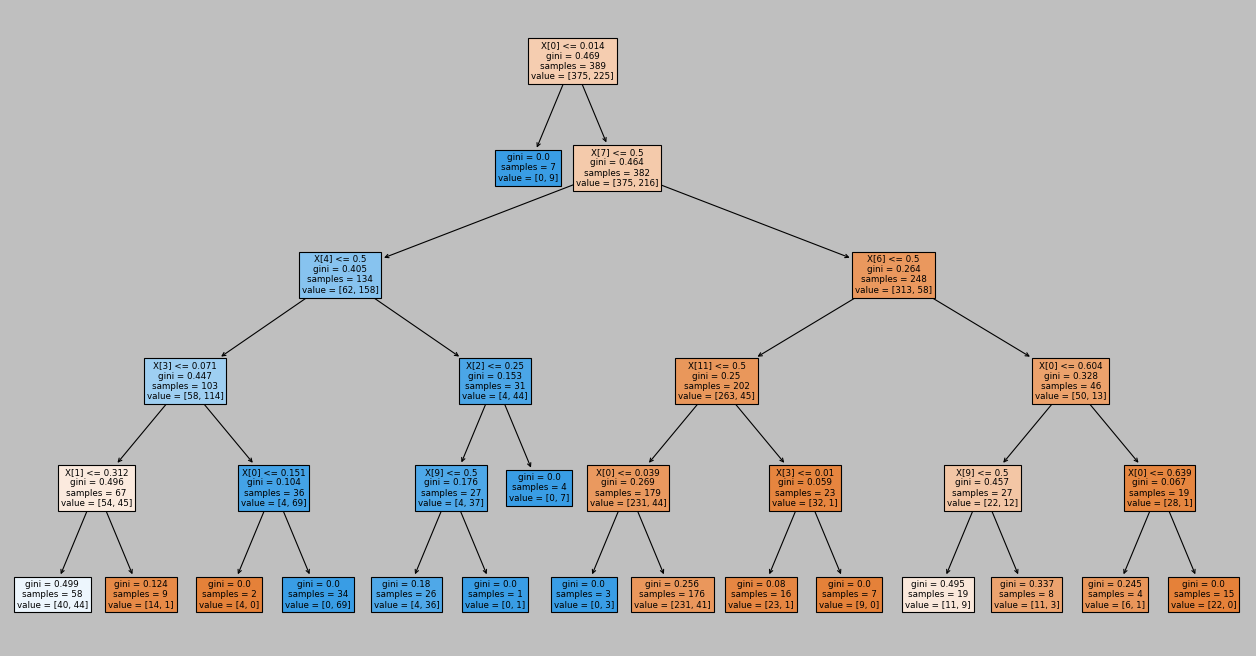

In [ ]:
with plt.style.context("classic"):
    plt.figure(figsize=(20, 10))
    plot_tree(model_rfr.estimators_[0], filled=True)

Y sus métricas:

In [ ]:
pred_first_estimator = model_rfr.estimators_[0].predict(X_test)
accuracy_score(y_test, pred_first_estimator)

0.8208955223880597

In [ ]:
precision_score(y_test, pred_first_estimator)

0.43243243243243246

In [ ]:
recall_score(y_test, pred_first_estimator)

In [ ]:
f1_score(y_test, pred_first_estimator)

In [ ]:
pred_estimators = [
    estimator.predict(X_test) for estimator in model_rfr.estimators_
]
acc_estimators = [accuracy_score(y_test, pred) for pred in pred_estimators]


Text(0.5, 1.0, 'Histograma de accuracy de los arboles del RF model')

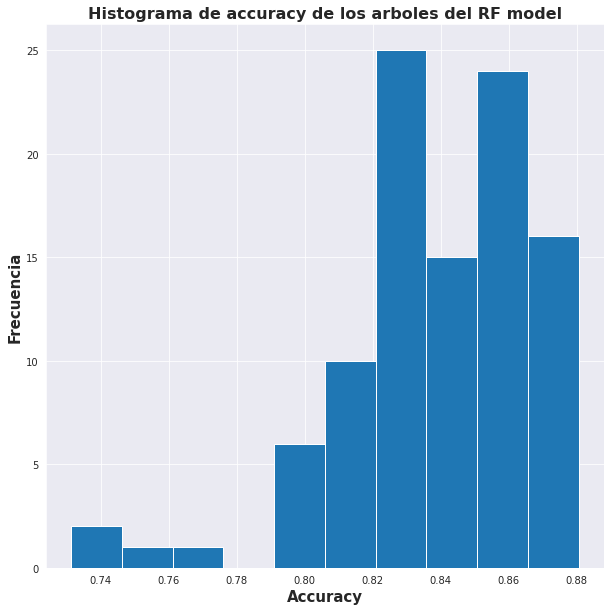

In [ ]:
plt.figure(figsize=(10, 10))
plt.hist(acc_estimators)
plt.xlabel("Accuracy", weight="bold", fontsize=15)
plt.ylabel("Frecuencia", weight="bold", fontsize=15)
plt.title(
    "Histograma de accuracy de los arboles del RF model", weight="bold", fontsize=16
)


In [ ]:
max(acc_estimators)

0.8805970149253731

In [ ]:
min(acc_estimators)

0.7313432835820896